# 3.1

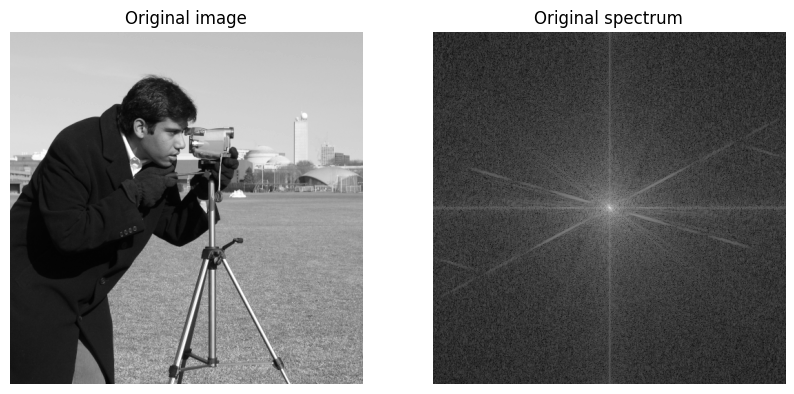

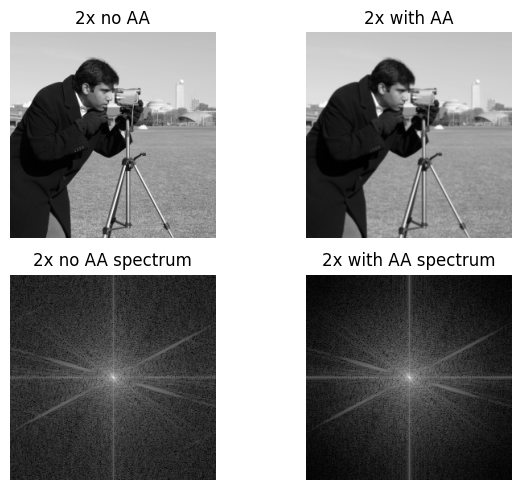

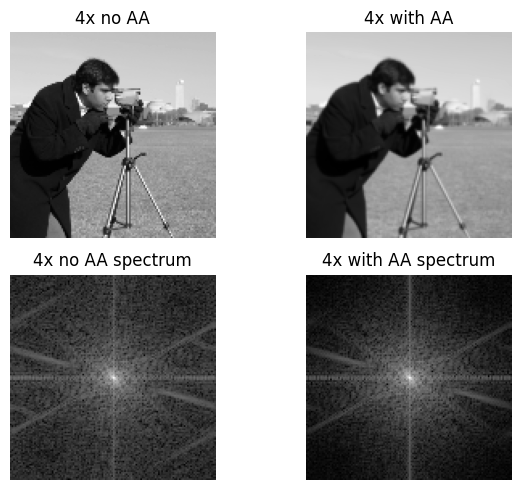

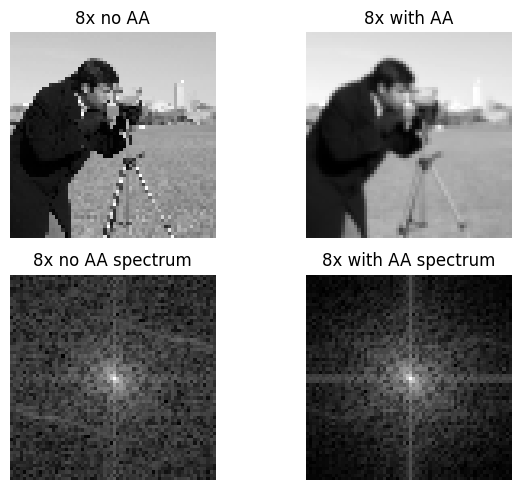

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, transform
import cv2 as cv

# Load and normalize image
img = data.camera().astype(float) / 255.0

def downsample(im, factor, antialias=True):
    if antialias:
        im = filters.gaussian(im, sigma=factor / 2)
    h, w = im.shape[:2]
    return transform.resize(im, (h // factor, w // factor), anti_aliasing=False)

def show_spectrum(im):
    F = np.fft.fftshift(np.fft.fft2(im))
    mag = np.log1p(np.abs(F))
    plt.imshow(mag, cmap='gray')
    plt.title('Magnitude spectrum')
    plt.axis('off')

# Show original image and its spectrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
show_spectrum(img)
plt.title('Original spectrum')
plt.show()

# Compare with and without antialiasing
for f in [2, 4, 8]:
    noaa = downsample(img, f, antialias=False)
    aa = downsample(img, f, antialias=True)

    plt.figure(figsize=(12, 5))
    
    # No antialiasing
    plt.subplot(2, 4, 1)
    plt.imshow(noaa, cmap='gray')
    plt.title(f'{f}x no AA')
    plt.axis('off')
    
    plt.subplot(2, 4, 5)
    show_spectrum(noaa)
    plt.title(f'{f}x no AA spectrum')
    
    # With antialiasing
    plt.subplot(2, 4, 2)
    plt.imshow(aa, cmap='gray')
    plt.title(f'{f}x with AA')
    plt.axis('off')
    
    plt.subplot(2, 4, 6)
    show_spectrum(aa)
    plt.title(f'{f}x with AA spectrum')

    plt.tight_layout()
    plt.show()

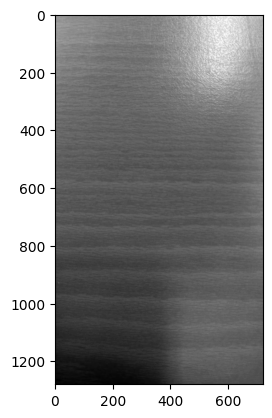

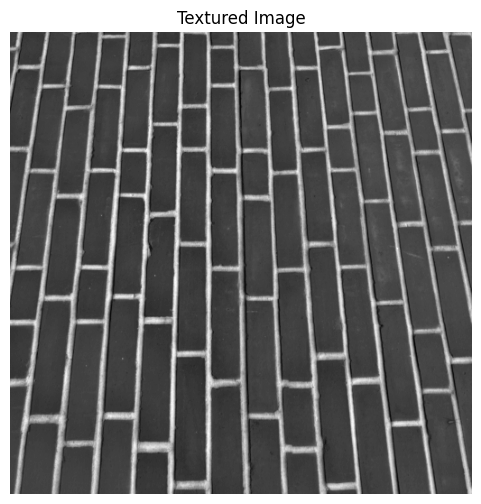

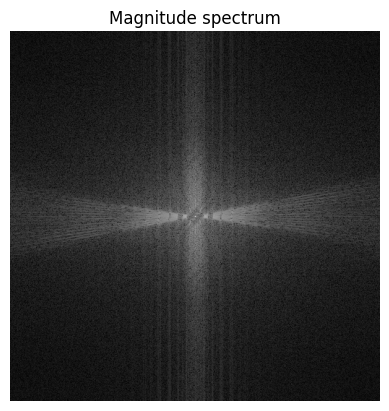

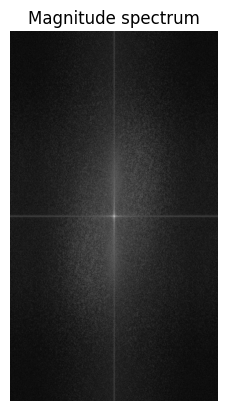

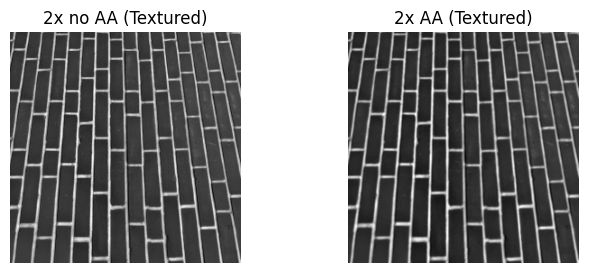

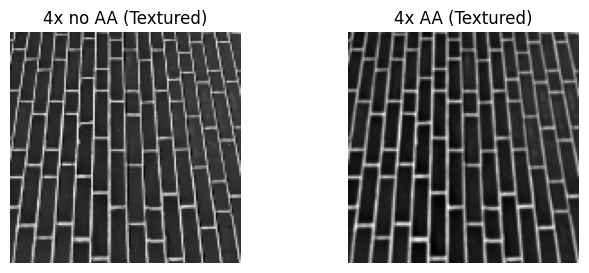

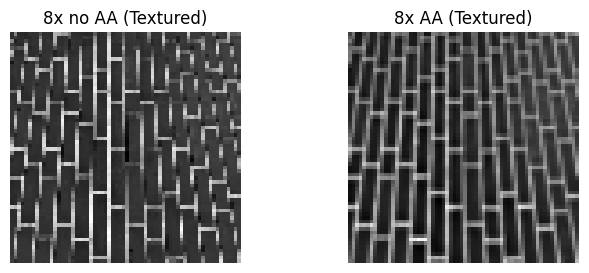

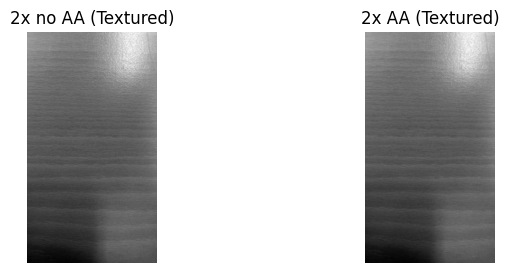

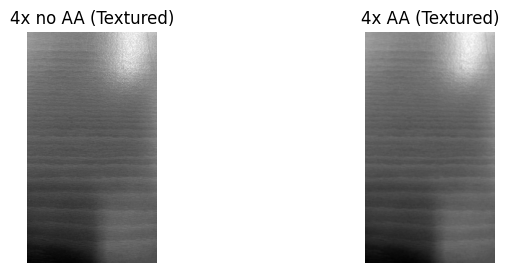

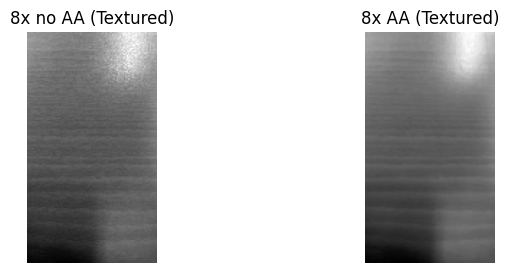

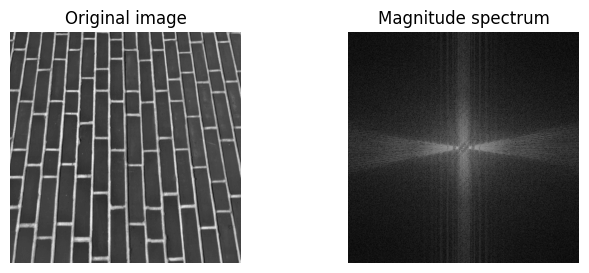

In [6]:
# Next, extend the experiment by selecting two very different images (for instance, the
# smooth camera image and a highly textured photo you take yourself). Discuss how
# aliasing manifests differently depending on image content, and explain how the filtering
# mitigates artifacts. You should include plots of the spectra alongside the downsampled
# images.

textured_img = data.brick().astype(float) / 255.0
table_img = cv.imread('table.jpg')
gray = cv.cvtColor(table_img, cv.COLOR_BGR2GRAY)
table_img = gray.astype(float) / 255.0
plt.imshow(table_img, cmap = 'gray')



plt.figure(figsize=(6, 6))
plt.imshow(textured_img, cmap='gray')
plt.title('Textured Image')
plt.axis('off')
plt.show()
# Show frequency spectrum of textured image
plt.figure()
show_spectrum(textured_img)
plt.show()

# Show frequency spectrum of textured image
plt.figure()
show_spectrum(table_img)
plt.show()


# Compare with and without antialiasing for textured image
for f in [2, 4, 8]:
    noaa = downsample(textured_img, f, antialias=False)
    aa = downsample(textured_img, f, antialias=True)

    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(noaa, cmap='gray')
    plt.title(f'{f}x no AA (Textured)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(aa, cmap='gray')
    plt.title(f'{f}x AA (Textured)')
    plt.axis('off')

    plt.show()


for f in [2, 4, 8]:
    noaa = downsample(table_img, f, antialias=False)
    aa = downsample(table_img, f, antialias=True)

    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(noaa, cmap='gray')
    plt.title(f'{f}x no AA (Textured)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(aa, cmap='gray')
    plt.title(f'{f}x AA (Textured)')
    plt.axis('off')

    plt.show()




plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.imshow(textured_img, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
show_spectrum(textured_img)


plt.show()


# 3.2

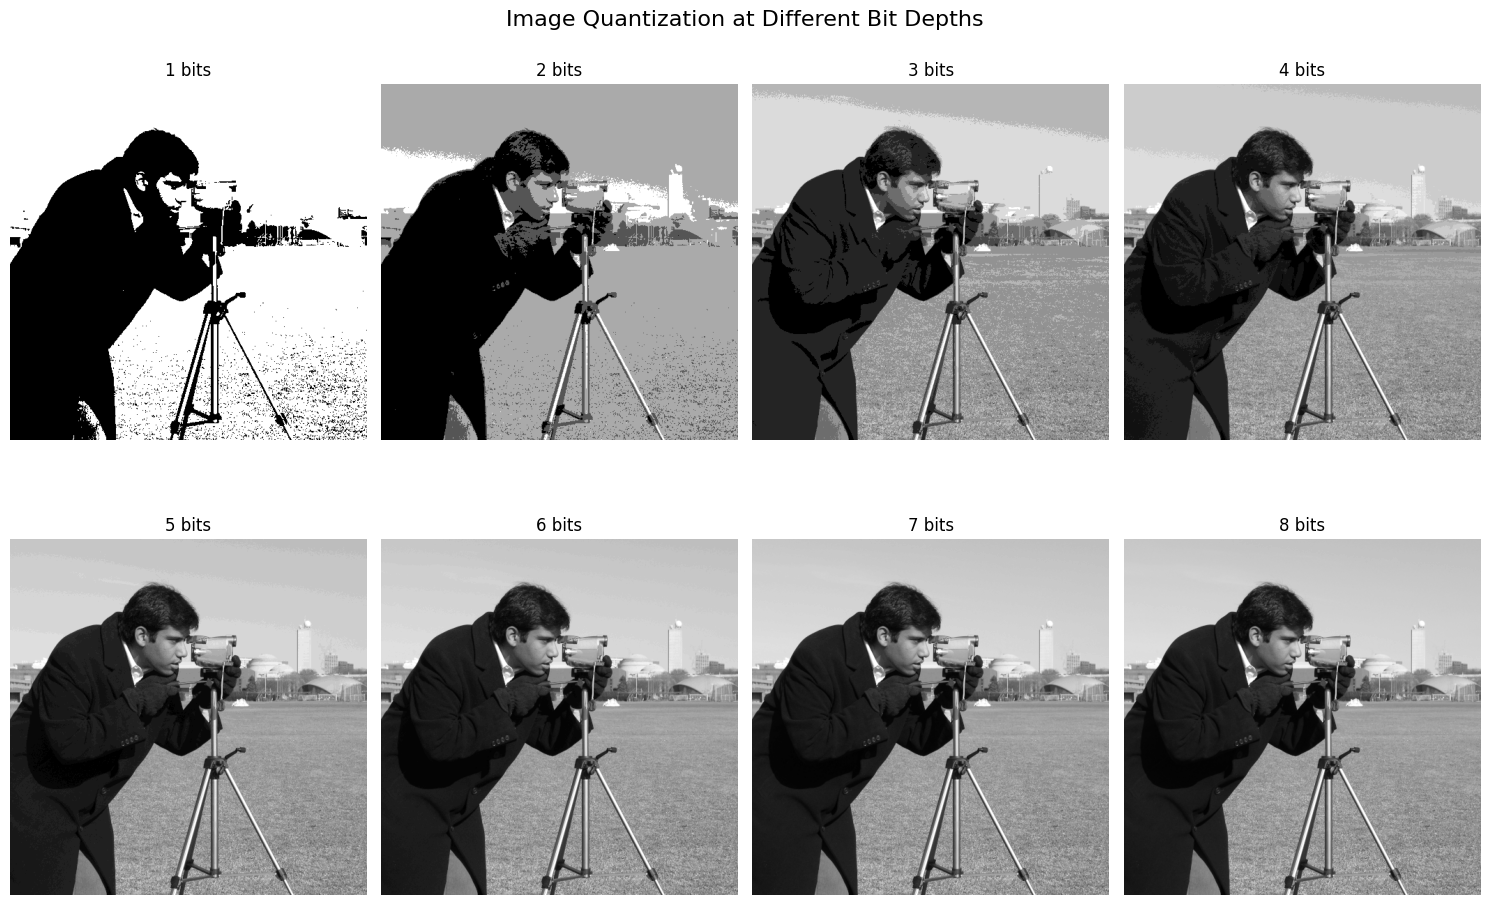

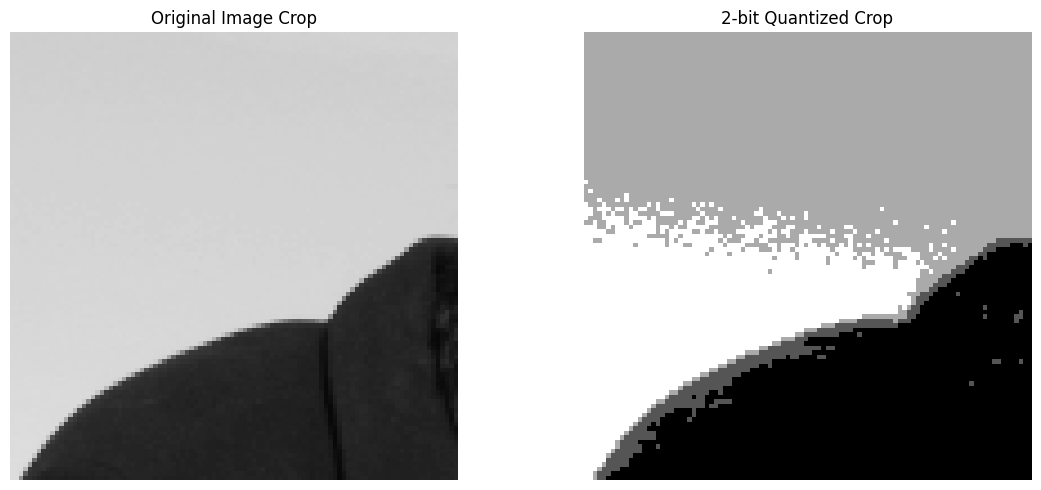

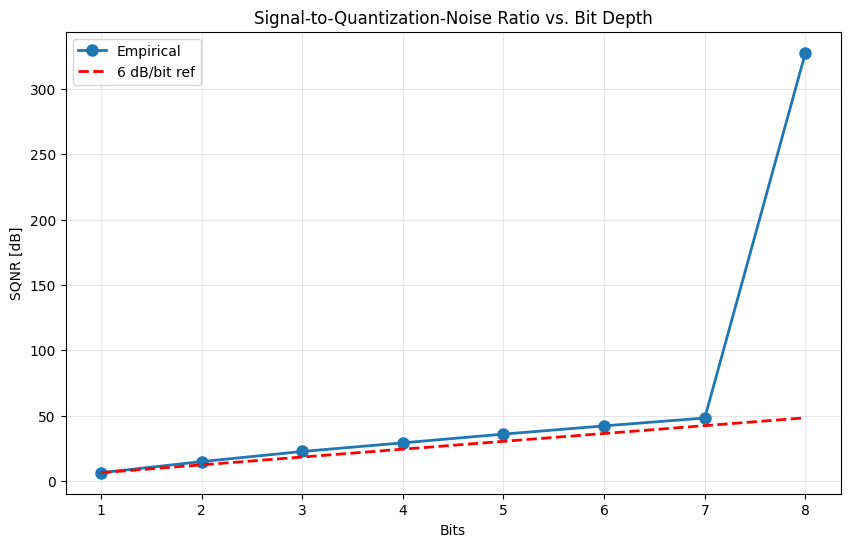

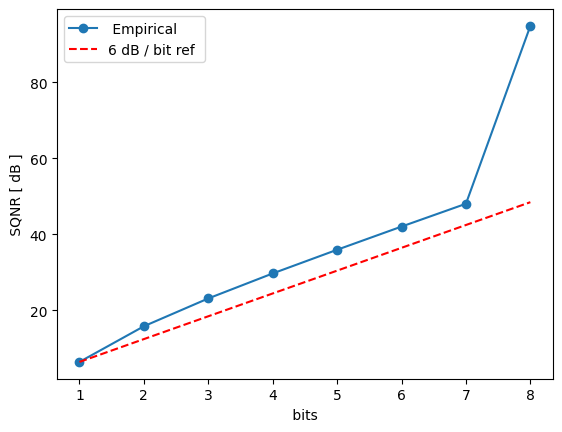

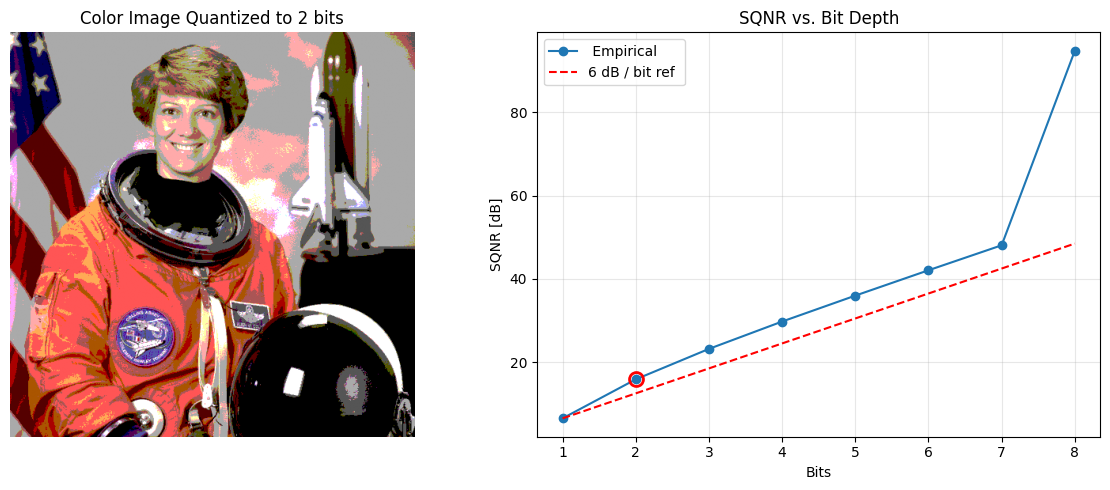

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.util import img_as_float

def quantize01(im01, bits):
    M = 2**bits
    return np.round(np.clip(im01, 0, 1) * (M - 1)) / (M - 1)

img = img_as_float(data.camera())

bits_list = [1, 2, 3, 4, 5,6, 7, 8]
sqnr = []

# Create figure for quantized images
plt.figure(figsize=(15, 10))

# Calculate SQNR and display quantized images
for i, b in enumerate(bits_list):
    q = quantize01(img, b)
    err = img - q
    
    mse = np.mean(err**2)
    sqnr.append(10 * np.log10(np.mean(img**2) / mse))
    
    # Display quantized image
    plt.subplot(2, 4, i+1)
    plt.imshow(q, cmap='gray', vmin=0, vmax=1)
    plt.title(f'{b} bits')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('Image Quantization at Different Bit Depths', fontsize=16, y=0.98)
plt.show()

# comparison crop

img = img_as_float(data.camera())

# Create 2-bit quantized image
img_2bit = quantize01(img, 2)

# Select a crop region (adjust these coordinates as needed)
y_start, y_end = 60, 160  # Vertical crop range
x_start, x_end = 60, 160  # Horizontal crop range

# Extract crops
crop_original = img[y_start:y_end, x_start:x_end]
crop_2bit = img_2bit[y_start:y_end, x_start:x_end]

# Create comparison plot
plt.figure(figsize=(12, 5))

# Original crop
plt.subplot(1, 2, 1)
plt.imshow(crop_original, cmap='gray', vmin=0, vmax=1)
plt.title('Original Image Crop')
plt.axis('off')

# 2-bit quantized crop
plt.subplot(1, 2, 2)
plt.imshow(crop_2bit, cmap='gray', vmin=0, vmax=1)
plt.title('2-bit Quantized Crop')
plt.axis('off')

plt.tight_layout()

plt.show()


# Create SQNR plot
ref = sqnr[0] + 6 * (np.array(bits_list) - bits_list[0])
plt.figure(figsize=(10, 6))
plt.plot(bits_list, sqnr, 'o-', label='Empirical', linewidth=2, markersize=8)
plt.plot(bits_list, ref, 'r--', label='6 dB/bit ref', linewidth=2)
plt.xlabel('Bits')
plt.ylabel('SQNR [dB]')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Signal-to-Quantization-Noise Ratio vs. Bit Depth')
plt.show()

# Repeat for a color image (per-channel or luminance) and comment on artifacts in
# flat vs. edge regions

color_img = data.astronaut().astype(float) / 255.0

# per-channel quantization
bits_list = [1 ,2 ,3 ,4,5 ,6 , 7,8]
sqnr = []
for b in bits_list :
    q = quantize01 ( color_img , b )
    err = color_img - q
    
    mse = np . mean ( err **2) + 1e-10
    sqnr . append (10* np . log10 ( np . mean ( color_img **2) / mse ) )

ref = sqnr [0] + 6*( np . array ( bits_list ) - bits_list [0])
plt.plot( bits_list , sqnr , 'o-' , label = ' Empirical ')  
plt.plot( bits_list , ref , 'r--' , label = '6 dB / bit ref ')
plt.xlabel( ' bits ') ; plt.ylabel( ' SQNR [ dB ] ') ; plt.legend() ; 
plt.show()






# Create 2x1 plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Show 2-bit quantized image
b = 2  # Select which bit level to display
q_img = quantize01(color_img, b)
ax1.imshow(q_img)
ax1.set_title(f'Color Image Quantized to {b} bits')
ax1.axis('off')

# Show SQNR plot
ax2.plot( bits_list , sqnr , 'o-' , label = ' Empirical ')  
ax2.plot( bits_list , ref , 'r--' , label = '6 dB / bit ref ')
ax2.set_xlabel('Bits')
ax2.set_ylabel('SQNR [dB]')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_title('SQNR vs. Bit Depth')

# Highlight the selected bit level on the plot
ax2.plot(b, sqnr[bits_list.index(b)], 'ro', markersize=10, fillstyle='none', markeredgewidth=2)

plt.tight_layout()
plt.show()



# 3.3

Y channel range: 0 255
Cb channel range: 116 204
Cr channel range: 61 175
Y channel shape: (512, 512)
Cb channel shape: (512, 512)
Cr channel shape: (512, 512)


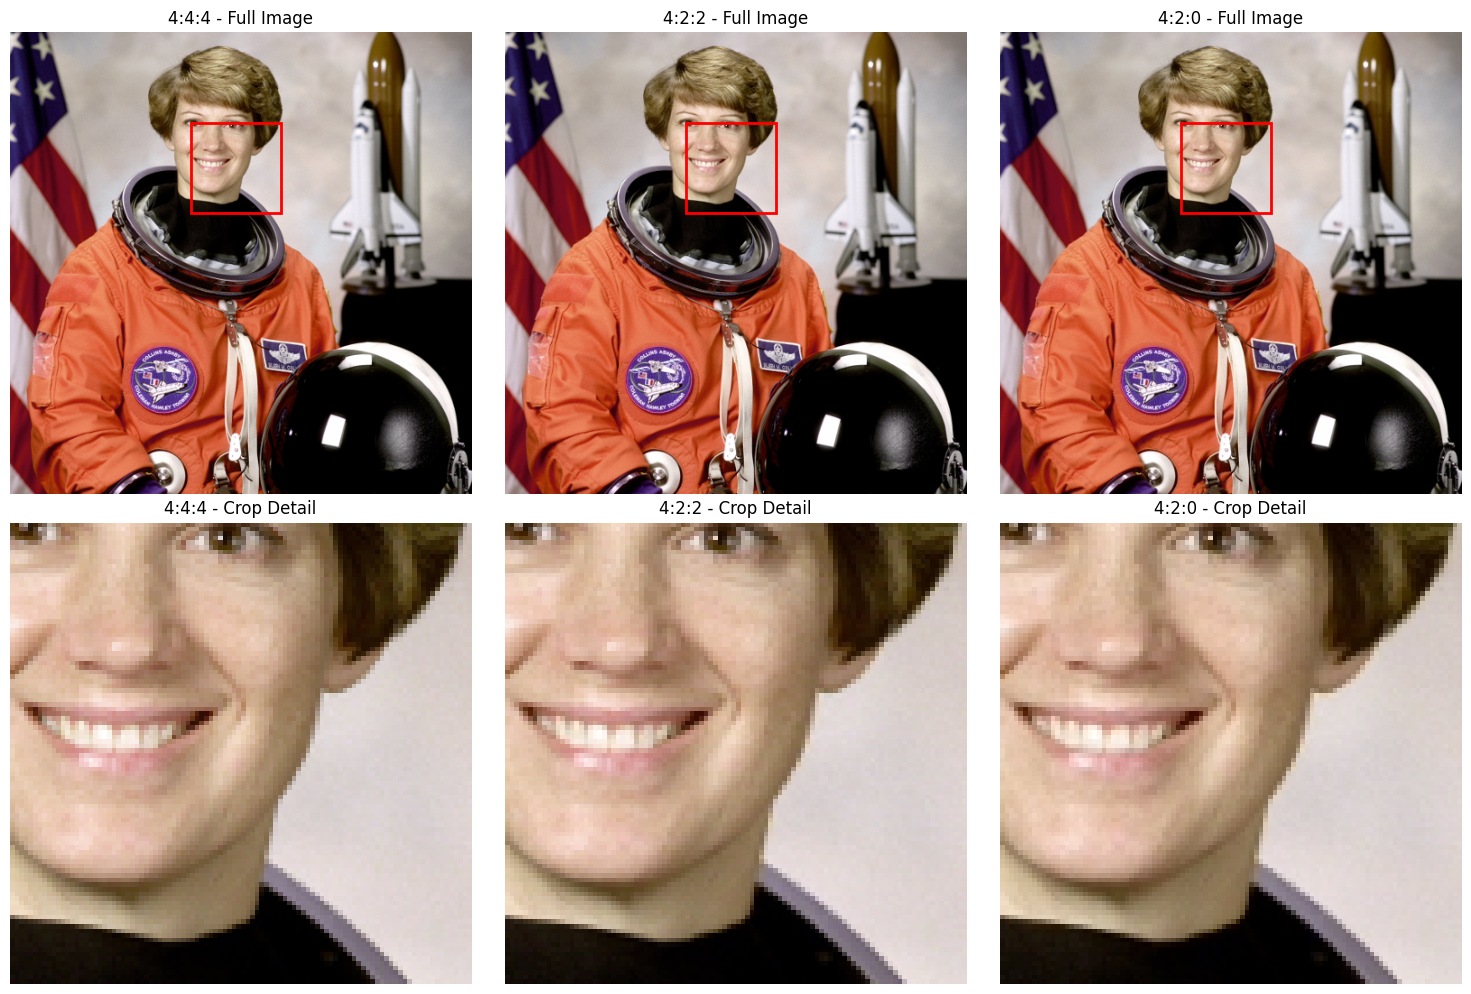

In [15]:
# Most compression schemes rely on separating luminance and chrominance. Convert a
# color image from RGB to Y’CbCr and reconstruct it under different chroma subsampling
# modes: 4:4:4, 4:2:2, and 4:2:0. Compare the visual quality and explain why chroma
# subsampling is perceptually acceptable. Include reconstructed images for each mode,
# and comment on differences in smooth versus detailed image regions.
import cv2
# Load a sample color image
color_img_rgb = data.astronaut()

# Convert RGB to YCbCr
color_img_ycbcr = cv2.cvtColor(color_img_rgb, cv2.COLOR_RGB2YCrCb)

# Split the channels
Y = color_img_ycbcr[:, :, 0]
Cb = color_img_ycbcr[:, :, 1]
Cr = color_img_ycbcr[:, :, 2]

#  verify ranges and shapes of Y, Cb, Cr
print("Y channel range:", Y.min(), Y.max())
print("Cb channel range:", Cb.min(), Cb.max())
print("Cr channel range:", Cr.min(), Cr.max())
print("Y channel shape:", Y.shape)
print("Cb channel shape:", Cb.shape)
print("Cr channel shape:", Cr.shape)

# Implement chroma subsampling and upsampling for 4:4:4, 4:2:2, and 4:2:0 (use box
# or Gaussian prefiltering before decimation).

def chroma_subsample_422(Cb, Cr):
    # Subsample Cb and Cr by a factor of 2 in the horizontal direction
    Cb_sub = Cb[:, ::2]
    Cr_sub = Cr[:, ::2]
    return Cb_sub, Cr_sub


def chroma_subsample_420(Cb, Cr):
    # Subsample Cb and Cr by a factor of 2 in both horizontal and vertical directions
    Cb_sub = Cb[::2, ::2]
    Cr_sub = Cr[::2, ::2]
    return Cb_sub, Cr_sub



def chroma_upsample_422(Cb_sub, Cr_sub):
    # Upsample Cb and Cr by a factor of 2 horizontally
    Cb = cv2.resize(Cb_sub, (Cb_sub.shape[1] * 2, Cb_sub.shape[0]), interpolation=cv2.INTER_LINEAR)
    Cr = cv2.resize(Cr_sub, (Cr_sub.shape[1] * 2, Cr_sub.shape[0]), interpolation=cv2.INTER_LINEAR)
    return Cb, Cr

def chroma_upsample_420(Cb_sub, Cr_sub):
    # Upsample Cb and Cr by a factor of 2 both horizontally and vertically
    Cb = cv2.resize(Cb_sub, (Cb_sub.shape[1] * 2, Cb_sub.shape[0] * 2), interpolation=cv2.INTER_LINEAR)
    Cr = cv2.resize(Cr_sub, (Cr_sub.shape[1] * 2, Cr_sub.shape[0] * 2), interpolation=cv2.INTER_LINEAR)
    return Cb, Cr




# Define a crop region (adjust these coordinates as needed)
y_start, y_end = 100, 200  # Vertical crop range
x_start, x_end = 200, 300  # Horizontal crop range

modes = ['4:4:4', '4:2:2', '4:2:0']
images_rgb = []

# 4:4:4 (no subsampling)
Y_444 = Y
Cb_444 = Cb
Cr_444 = Cr
img_444 = cv2.merge([Y_444, Cb_444, Cr_444])
img_444_rgb = cv2.cvtColor(img_444.astype(np.uint8), cv2.COLOR_YCrCb2RGB)
images_rgb.append(img_444_rgb)

# 4:2:2
Cb_422, Cr_422 = chroma_subsample_422(Cb, Cr)
Cb_422_up, Cr_422_up = chroma_upsample_422(Cb_422, Cr_422)
img_422 = cv2.merge([Y, Cb_422_up, Cr_422_up])
img_422_rgb = cv2.cvtColor(img_422.astype(np.uint8), cv2.COLOR_YCrCb2RGB)
images_rgb.append(img_422_rgb)

# 4:2:0
Cb_420, Cr_420 = chroma_subsample_420(Cb, Cr)
Cb_420_up, Cr_420_up = chroma_upsample_420(Cb_420, Cr_420)
img_420 = cv2.merge([Y, Cb_420_up, Cr_420_up])
img_420_rgb = cv2.cvtColor(img_420.astype(np.uint8), cv2.COLOR_YCrCb2RGB)
images_rgb.append(img_420_rgb)

# Create comparison plot
plt.figure(figsize=(15, 10))

# Display full images
for i, (mode, img) in enumerate(zip(modes, images_rgb)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f'{mode} - Full Image')
    plt.axis('off')
    
    # Add rectangle to show crop area
    rect = plt.Rectangle((x_start, y_start), x_end-x_start, y_end-y_start, 
                         fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rect)

# Display cropped images
for i, (mode, img) in enumerate(zip(modes, images_rgb)):
    crop = img[y_start:y_end, x_start:x_end]
    plt.subplot(2, 3, i+4)
    plt.imshow(crop)
    plt.title(f'{mode} - Crop Detail')
    plt.axis('off')

plt.tight_layout()

plt.show()

# 4.1

In [16]:
import numpy as np
def entropy ( p ):
    p = p [ p > 0]
    return - np . sum ( p * np . log2 ( p ) )
pf = np . ones (6) /6
pb = np . array ([0.10 , 0.20 , 0.10 , 0.20 , 0.20 , 0.20])
Hf , Hb = entropy ( pf ) , entropy ( pb )
Pxy = np . ones ((6 ,6) ) /36 # independent fair dice
Hxy = entropy( Pxy . ravel () )

print("Entropy of fair dice (Hf):", Hf)
print("Entropy of biased dice (Hb):", Hb)
print("Joint entropy of fair dice (Hxy):", Hxy)

Entropy of fair dice (Hf): 2.584962500721156
Entropy of biased dice (Hb): 2.5219280948873624
Joint entropy of fair dice (Hxy): 5.169925001442311


In [ ]:
# Sequence Experiments


# Generate an i.i.d. length-N sequence from pf and pb; estimate empirical entropy
# Hˆ (X) and compare to theoretical.

N = 10
Xf = np.random.choice(6, size=N, p=pf)
Xb = np.random.choice(6, size=N, p=pb)
Hf_empirical = entropy(np.bincount(Xf, minlength=6) / N)
Hb_empirical = entropy(np.bincount(Xb, minlength=6) / N)
print("Empirical Entropy of fair dice (Hf_empirical):", Hf_empirical)
print("Empirical Entropy of biased dice (Hb_empirical):", Hb_empirical)

# Empirical entropy of fair dice is slightly smaller than theoretical one, while we observe a greater deviatio for the biased dice.


# TODO 4.1.2



Empirical Entropy of fair dice (Hf_empirical): 2.5219280948873624
Empirical Entropy of biased dice (Hb_empirical): 1.7609640474436812


# 4.2

Moon image (smooth) entropy:   4.8850 bits
Grass image (textured) entropy: 7.2883 bits


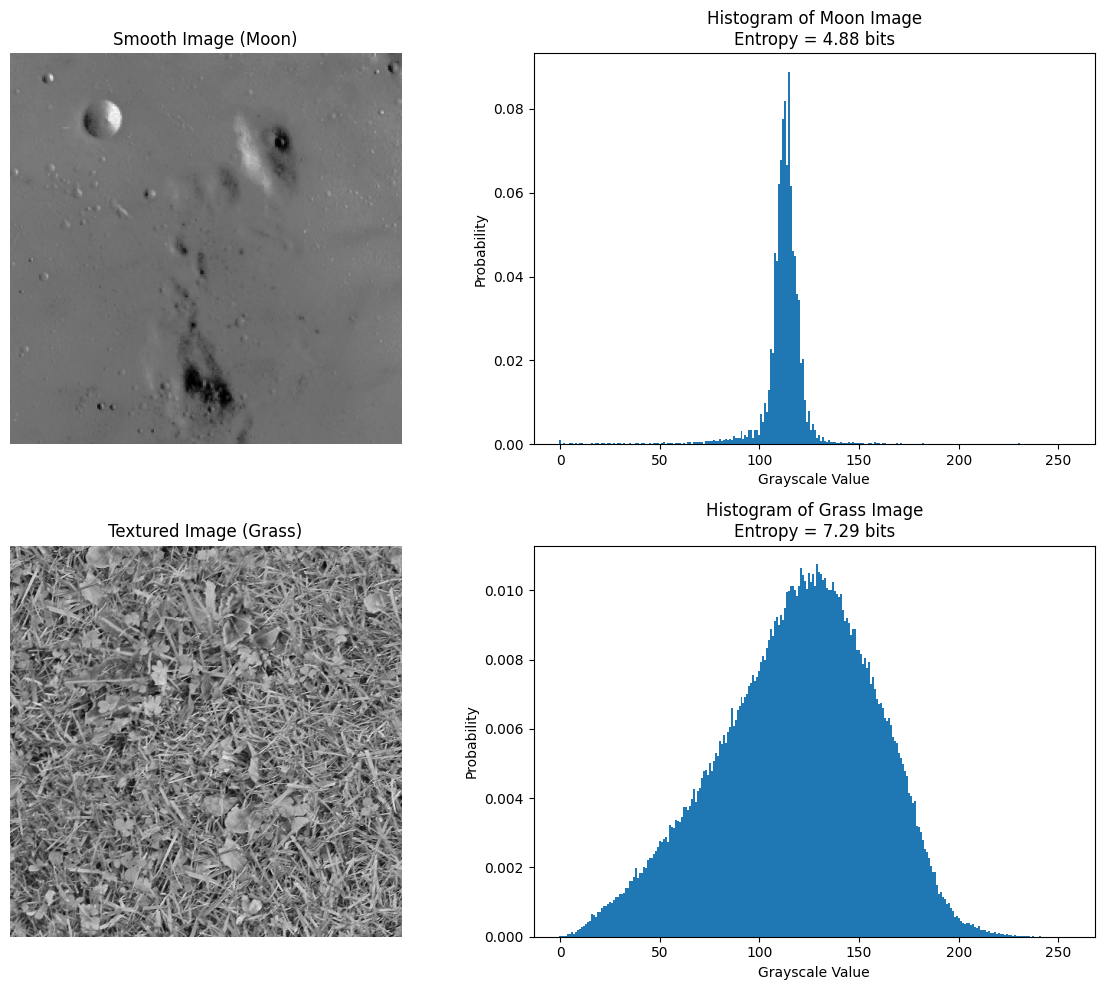

In [17]:
# Apply the same concept to images by estimating the probability mass function of
# grayscale values using histograms. Compute the entropy of at least two images with
# different characteristics (e.g., smooth versus textured). Discuss which image has higher
# entropy and why. Relate this to how much compression potential you expect for each.

# Compute 256-bin histograms (counts normalized to sum to 1) for at least two images;
# compute entropy
from skimage.exposure import histogram
from scipy.stats import entropy
from skimage import data, color
import numpy as np
import matplotlib.pyplot as plt

img1 = data.moon().astype(float) / 255.0  # smooth image
img2 = data.grass().astype(float) / 255.0   # textured image
# Ensure grayscale
if img2.ndim == 3:  
    img2 = color.rgb2gray(img2)

# Compute histograms with np.histogram (counts, not density)
hist1, bin_edges1 = np.histogram(img1.ravel(), bins=256, range=(0,1), density=False)
hist2, bin_edges2 = np.histogram(img2.ravel(), bins=256, range=(0,1), density=False)

# Normalize to probabilities
hist1 = hist1 / hist1.sum()
hist2 = hist2 / hist2.sum()

# Compute entropies
entropy1 = entropy(hist1, base=2)
entropy2 = entropy(hist2, base=2)

print(f"Moon image (smooth) entropy:   {entropy1:.4f} bits")
print(f"Grass image (textured) entropy: {entropy2:.4f} bits")

# Create 2x2 grid with images and histograms
plt.figure(figsize=(12, 10))

# Moon image
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title(f'Smooth Image (Moon)')
plt.axis('off')

# Moon histogram
plt.subplot(2, 2, 2)
plt.bar(np.arange(256), hist1, width=1.0)
plt.title(f'Histogram of Moon Image\nEntropy = {entropy1:.2f} bits')
plt.xlabel('Grayscale Value')
plt.ylabel('Probability')

# Grass image
plt.subplot(2, 2, 3)
plt.imshow(img2, cmap='gray')
plt.title(f'Textured Image (Grass)')
plt.axis('off')

# Grass histogram
plt.subplot(2, 2, 4)
plt.bar(np.arange(256), hist2, width=1.0)
plt.title(f'Histogram of Grass Image\nEntropy = {entropy2:.2f} bits')
plt.xlabel('Grayscale Value')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

# 4.3

In [19]:
# Joint and Conditional Entropy

# Extend the analysis by computing the joint histogram of horizontally adjacent pixel
# pairs. From this, estimate joint entropy, conditional entropy, and mutual information.
# Compare these values to the marginal entropy of individual pixels. You should find that
# conditional entropy is significantly lower, revealing that neighboring pixels are highly
# predictable.




img1 = data.moon().astype(float) / 255.0  # smooth image
#Compute joint histogram PXY for adjacent pixels and normalize to a joint pmf
H, xedges, yedges = np.histogram2d(img1[:-1, :].ravel(), img1[1:, :].ravel(), bins=256, range=[[0, 1], [0, 1]], density=False)
H = H / H.sum()  # Normalize to joint pmf
# Compute joint entropy H(X,Y)
Px = H.sum(axis=1)
Py = H.sum(axis=0)
Hxy = entropy(H.ravel(), base=2)
Hx = entropy(Px, base=2) 
Hy = entropy(Py, base=2)    
H_cond = Hxy - Hx  # Conditional entropy H(X|Y)
Ixy = Hx - H_cond  # Mutual information I(X;Y)

# Compare H(Y | X) to H(Y ) and explain spatial predictability

print(f"Joint Entropy H(X,Y): {Hxy:.4f} bits")
print(f"Marginal Entropy H(X): {Hx:.4f} bits")
print(f"Marginal Entropy H(Y): {Hy:.4f} bits")
print(f"Conditional Entropy H(Y|X): {H_cond:.4f} bits")
print(f"Mutual Information I(X;Y): {Ixy:.4f} bits")
# The conditional entropy H(Y|X) is significantly lower than the marginal entropy H(Y), indicating that knowing the value of one pixel greatly reduces the uncertainty about its neighbor. This reflects the high spatial predictability in images, where adjacent pixels often have similar values, especially in smooth regions.


Joint Entropy H(X,Y): 7.1488 bits
Marginal Entropy H(X): 4.8851 bits
Marginal Entropy H(Y): 4.8854 bits
Conditional Entropy H(Y|X): 2.2637 bits
Mutual Information I(X;Y): 2.6213 bits


# 4.4

Original Image Entropy: 4.8850 bits
Residual Image Entropy: 1.9121 bits
Maximum Possible Entropy: 8.0000 bits
Redundancy R: 0.3894


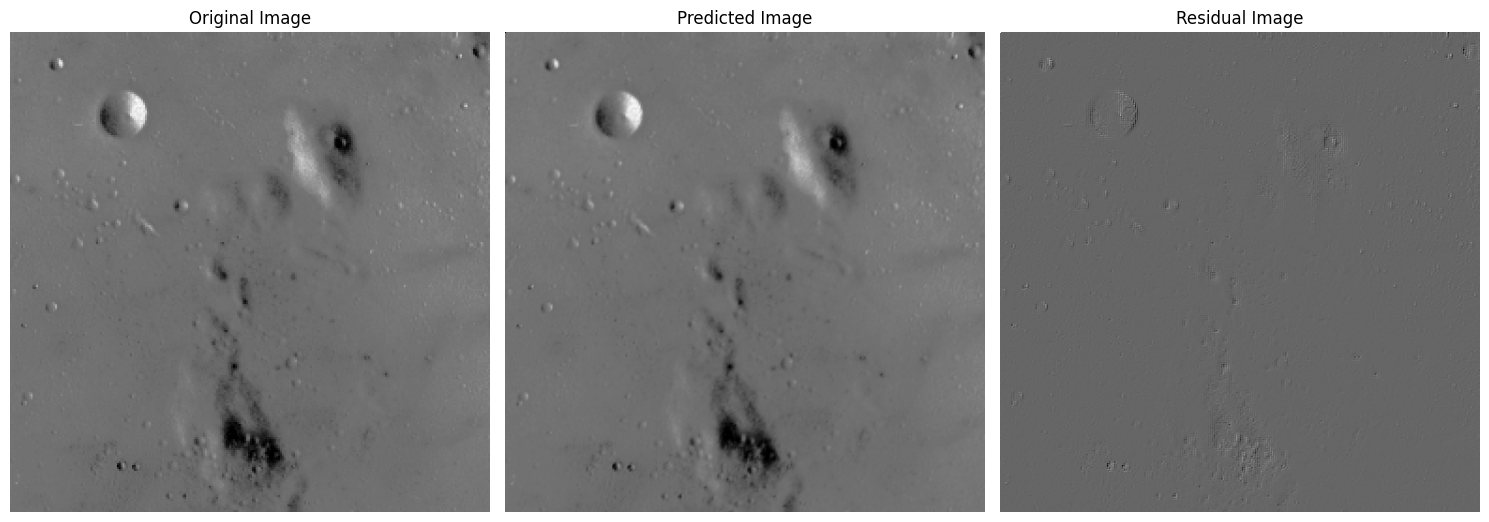

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from skimage import data

def simple_predictor(img):
    h, w = img.shape
    pred = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            if i == 0 and j == 0:
                pred[i, j] = 0  # No neighbors for the top-left pixel
            elif i == 0:
                pred[i, j] = img[i, j-1]  # Only left neighbor
            elif j == 0:
                pred[i, j] = img[i-1, j]  # Only upper neighbor
            else:
                pred[i, j] = (img[i-1, j] + img[i, j-1]) / 2  # Average of left and upper neighbors
    return pred

def compute_residuals(img, pred):
    return img - pred

# Load a grayscale image
img = data.moon().astype(float) / 255.0

# Predict pixel values
pred = simple_predictor(img)

# Compute residuals
residuals = compute_residuals(img, pred)

# Compute histogram and entropy of residuals
hist_res, _ = np.histogram(residuals.ravel(), bins=256, range=(-1, 1), density=False)
hist_res = hist_res / hist_res.sum()  # Normalize to pmf
entropy_res = entropy(hist_res, base=2)

# Compute histogram and entropy of original image
hist_orig, _ = np.histogram(img.ravel(), bins=256, range=(0, 1), density=False)
hist_orig = hist_orig / hist_orig.sum()  # Normalize to pmf
entropy_orig = entropy(hist_orig, base=2)

# Estimate redundancy R
max_entropy = np.log2(256)  # Maximum possible entropy for 8-bit image
redundancy_R = 1 - (entropy_orig / max_entropy)

print(f"Original Image Entropy: {entropy_orig:.4f} bits")
print(f"Residual Image Entropy: {entropy_res:.4f} bits")
print(f"Maximum Possible Entropy: {max_entropy:.4f} bits")
print(f"Redundancy R: {redundancy_R:.4f}")

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Predicted image
axes[1].imshow(pred, cmap='gray')
axes[1].set_title('Predicted Image')
axes[1].axis('off')

# Residual image
axes[2].imshow(residuals, cmap='gray')
axes[2].set_title('Residual Image')
axes[2].axis('off')



# Text summary
axes[2].axis('off')


plt.tight_layout()
plt.show()